# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

According to the book, the WHO is defined as the audience and stressed the importance of specification as opposed to generalization like "internal or external stakeholders". The WHAT is the action or the need for my audience to know what I am presenting with the data story. Lastly, the HOW is making the best selection of data that will explain the WHAT to the WHO. 

# 3. Homework - work with your own data

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import matplotlib.pyplot as plt

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

Yes the data from the first two selected data sets is usable and I have run some preliminary analysis on the datasets. In the marketing dataset I noticed there was some missing values where I had to fill in the missing rows with the mean of the column. The column that had missing values was for income which led to my decision to use the mean. If I wanted to get a better reading I might look to split or isolate other factors to make this more accurate. For example I might want to break up the rows of missing income according to age because I would expect to see someone older making a higher income given the experience in the market.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [29]:
#DataSet 1 (Health Care)
path_health = kagglehub.dataset_download("rabieelkharoua/chronic-kidney-disease-dataset-analysis")
print("Path to dataset files:", path_health)

#DataSet 2 (Marketing)
path_marketing = kagglehub.dataset_download("rodsaldanha/arketing-campaign")
print("Path to dataset files:", path_marketing)

#DataSet 3 (Energy)
path_energy = kagglehub.dataset_download("guillemservera/fuels-futures-data")
print("Path to dataset files:", path_energy)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/rodsaldanha/arketing-campaign/versions/8
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/guillemservera/fuels-futures-data/versions/191


In [30]:
#Health Dataframe
path_to_file = os.path.join(path_health, "Chronic_Kidney_Dsease_data.csv")
df_health = pd.read_csv(path_to_file)

#Marketing Dataframe
path_to_file_two = os.path.join(path_marketing, "marketing_campaign.csv")
df_marketing = pd.read_csv(path_to_file_two, sep=";")

#Energy Dataframe
path_to_file_three = os.path.join(path_energy, "all_fuels_data.csv")
df_energy = pd.read_csv(path_to_file_three)

In [31]:
#Health Information EDA
# 1. Quick Summary
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [32]:
# 2. Stats
print(df_health.describe())

         PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
mean    830.000000    54.441230     0.515371     0.71308             0.977697   
std     479.056364    20.549757     0.499914     1.00043             0.776686   
min       1.000000    20.000000     0.000000     0.00000             0.000000   
25%     415.500000    36.000000     0.000000     0.00000             0.000000   
50%     830.000000    54.000000     1.000000     0.00000             1.000000   
75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
max    1659.000000    90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252          

In [33]:
# 3. Dups
print("Row-dups:", df_health.duplicated().sum())
print("PatientID-dups:", df_health['PatientID'].duplicated().sum())

Row-dups: 0
PatientID-dups: 0


In [34]:
# 4. Nulls
print("Nulls:\n", df_health.isnull().sum())

Nulls:
 PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectro

In [35]:
# 5. Inconsistencies
print("Bad ages:\n", df_health[(df_health['Age']<0)|(df_health['Age']>120)])
print("Bad activity:\n", df_health[df_health['PhysicalActivity']<0])

# 6. One-hot encode
df_health_ready = pd.get_dummies(
    df_health,
    columns=['Gender','Ethnicity','SocioeconomicStatus','EducationLevel','Smoking']
)

Bad ages:
 Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, SocioeconomicStatus, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryKidneyDisease, FamilyHistoryHypertension, FamilyHistoryDiabetes, PreviousAcuteKidneyInjury, UrinaryTractInfections, SystolicBP, DiastolicBP, FastingBloodSugar, HbA1c, SerumCreatinine, BUNLevels, GFR, ProteinInUrine, ACR, SerumElectrolytesSodium, SerumElectrolytesPotassium, SerumElectrolytesCalcium, SerumElectrolytesPhosphorus, HemoglobinLevels, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, ACEInhibitors, Diuretics, NSAIDsUse, Statins, AntidiabeticMedications, Edema, FatigueLevels, NauseaVomiting, MuscleCramps, Itching, QualityOfLifeScore, HeavyMetalsExposure, OccupationalExposureChemicals, WaterQuality, MedicalCheckupsFrequency, MedicationAdherence, HealthLiteracy, Diagnosis, DoctorInCharge]
Index: []

[0 rows x 54 columns]
Bad activity:
 Empty DataFrame
Colu

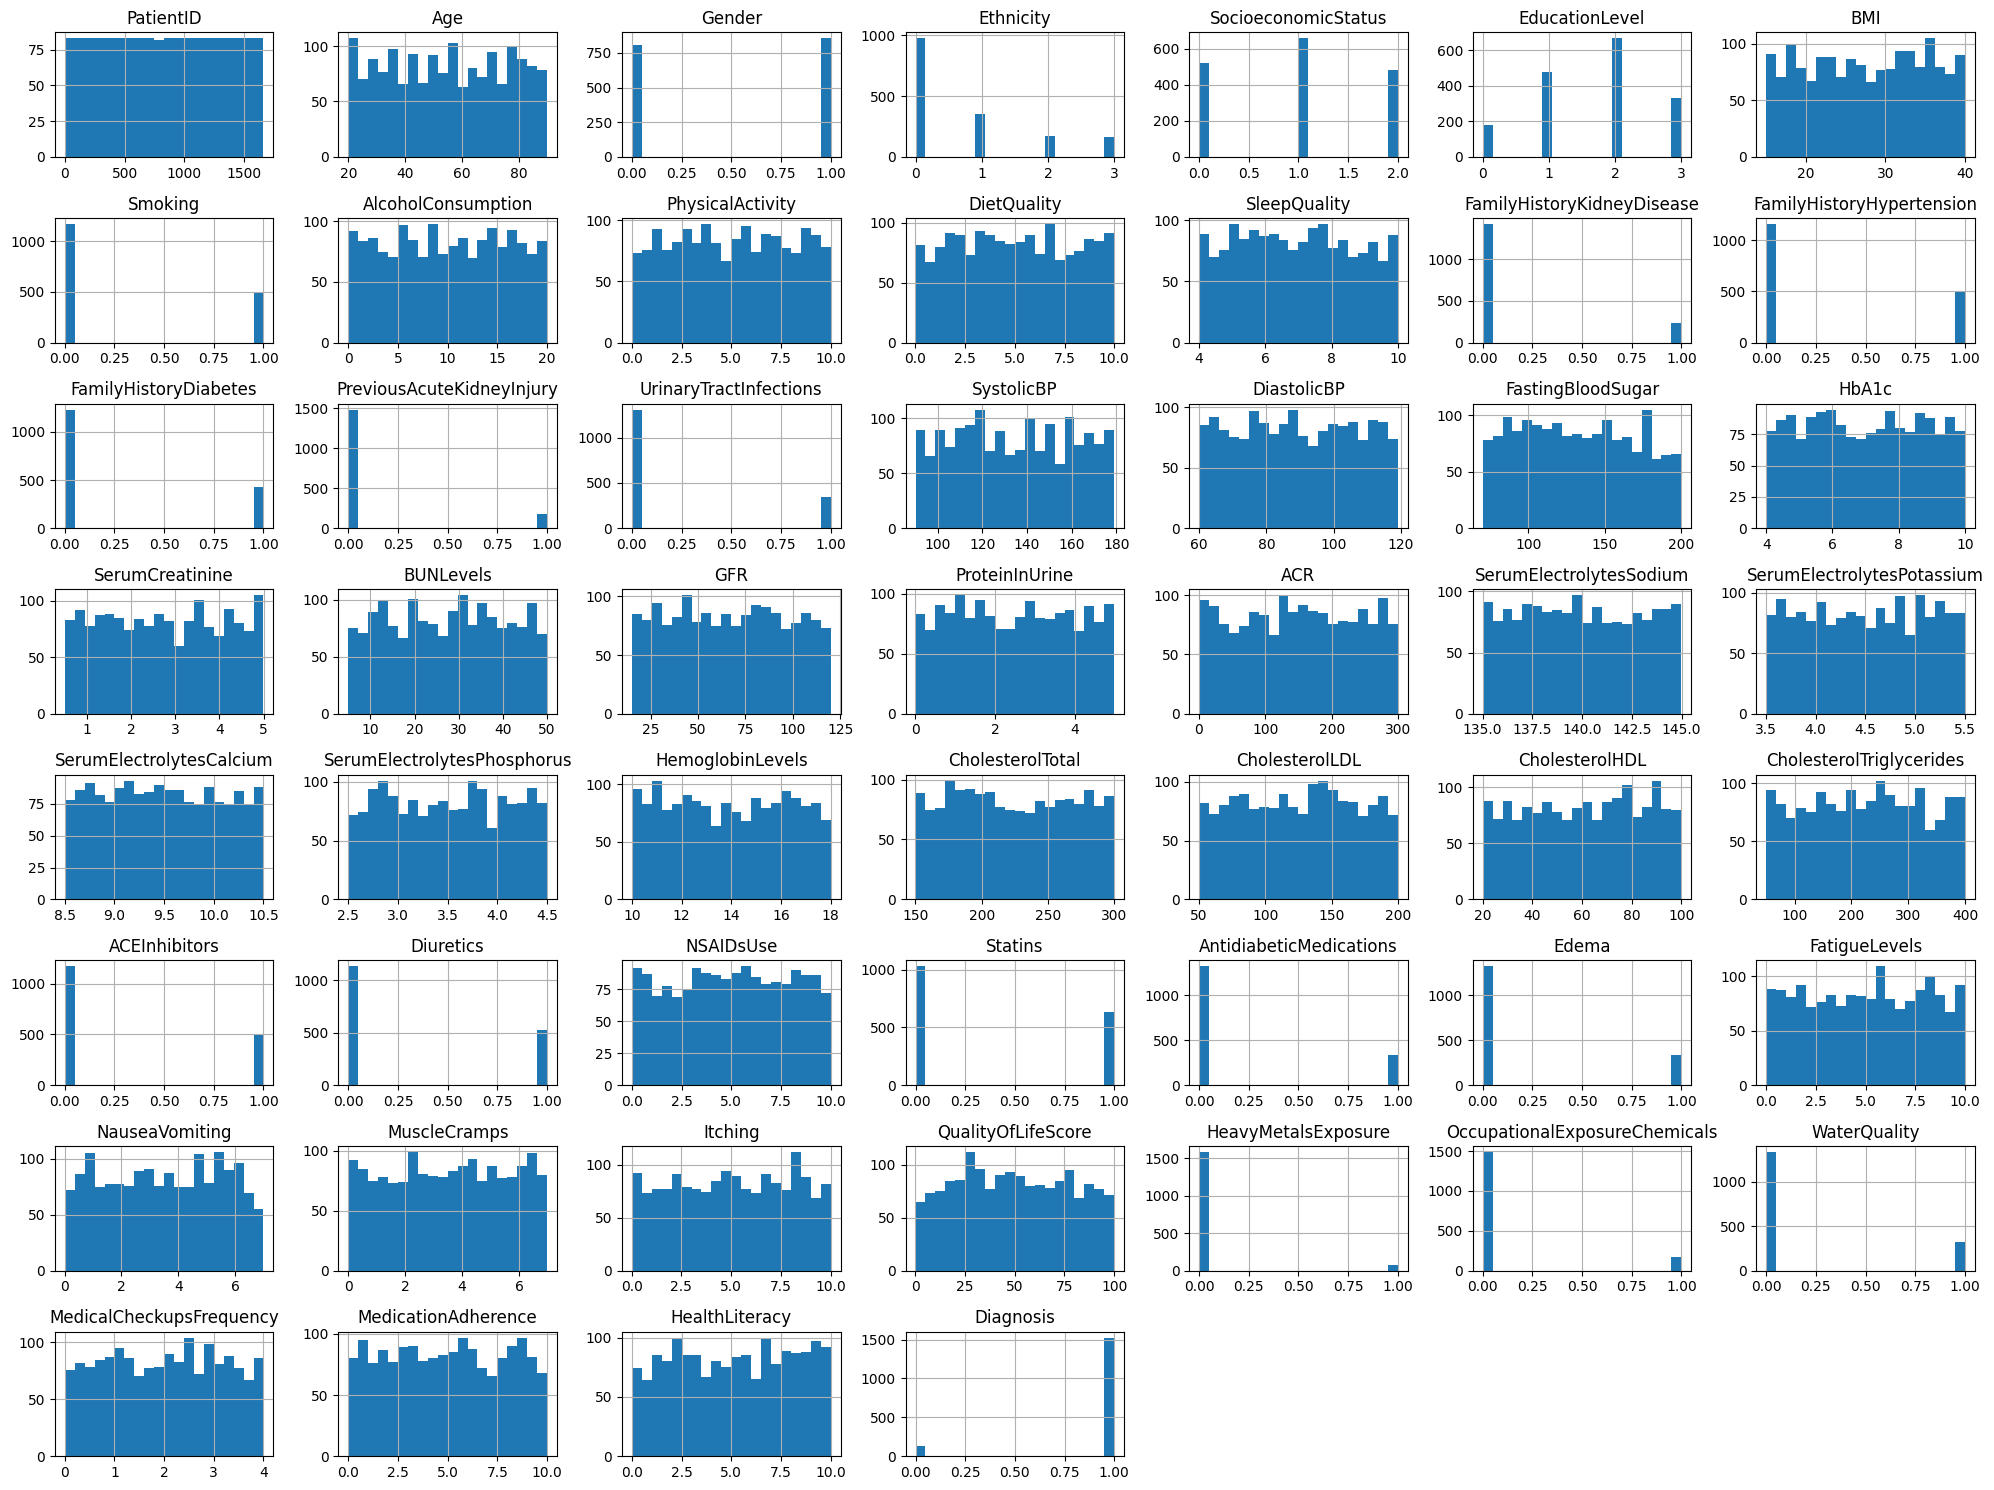

In [36]:
# 8. Frequency 

num_cols = df_health.select_dtypes(include=['int64','float64']).columns

# draw a histogram for each numeric column
df_health[num_cols].hist(bins=20, figsize=(20, 15))

plt.tight_layout()
plt.show()


In [37]:
#Marketing Information EDA
# 1. Quick Summary
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [38]:
# 2. Stats
print(df_marketing.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [39]:
# 3. Dups
print("Row-dups:", df_marketing.duplicated().sum())

Row-dups: 0


In [40]:
# 4. Nulls
print("Nulls:\n", df_marketing_clean.isnull().sum())

Nulls:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [41]:
# 5. Fix or drop
num_cols = df_marketing.select_dtypes(include=['int64','float64']).columns

means = df_marketing[num_cols].mean()

df_marketing_clean = df_marketing.copy()
df_marketing_clean[num_cols] = df_marketing_clean[num_cols].fillna(means)


In [42]:
# 6. Histogram Frequency 

num_cols = df_marketing_clean.select_dtypes(include=['int64','float64']).columns

# draw a histogram for each numeric column
df_marketing_clean[num_cols].hist(bins=20, figsize=(20, 15))

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
df = df_marketing_clean.copy()
df['Age'] = 2025 - df['Year_Birth']

bins   = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73]
labels = [f"{start}-{end-1}" for start, end in zip(bins[:-1], bins[1:])]

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    right=False
)
summary = (
    df
    .groupby('AgeGroup')[['Income','Kidhome','Teenhome']]
    .mean()
    .rename(columns={
        'Income':   'Avg Income',
        'Kidhome':  'Avg Kids at Home',
        'Teenhome': 'Avg Teens at Home'
    })
    .round(2)
)

summary


/tmp/ipykernel_5589/3287581858.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('AgeGroup')[['Income','Kidhome','Teenhome']]


,Avg Income,Avg Kids at Home,Avg Teens at Home
AgeGroup,,,
18-22,NaN,NaN,NaN
23-27,NaN,NaN,NaN
28-32,63576.87,0.00,0.00
33-37,47046.01,0.45,0.00
38-42,43407.53,0.64,0.00
43-47,47761.39,0.63,0.25
48-52,50897.19,0.55,0.53
53-57,50646.41,0.56,0.55
58-62,53340.21,0.37,0.78


I decided to replicate the table in figure 2.3 for this weeks chart plotting. Earlier in the notebook I said that I would assume that as people get older their income goes up due to experience in the marketplace. I was surprised to see that this assumption was incorrect and its in fact the earliest age group that makes the highest income. 

In [2]:
print("Hello")

Hello
